# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip3 install citipy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
    
# while statement to get cities below 500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


608


In [10]:
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,barentsburg,,,,,,,
1,masaka,,,,,,,
2,hami,,,,,,,
3,talnakh,,,,,,,
4,kavieng,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print(cities)

['barentsburg', 'masaka', 'hami', 'talnakh', 'kavieng', 'sao jose da coroa grande', 'cape town', 'leningradskiy', 'hilo', 'evora', 'rio gallegos', 'apache junction', 'chapais', 'bathsheba', 'lompoc', 'ulaanbaatar', 'samarai', 'mikhaylovka', 'bullhead city', 'thompson', 'mataura', 'esperance', 'srednekolymsk', 'puerto ayora', 'gao', 'tuktoyaktuk', 'khatanga', 'diamantino', 'airai', 'illoqqortoormiut', 'inhambane', 'barawe', 'taolanaro', 'luderitz', 'vaitupu', 'seoul', 'bredasdorp', 'puerto ayacucho', 'tasiilaq', 'cidreira', 'attawapiskat', 'raton', 'mys shmidta', 'albany', 'sorland', 'upernavik', 'mayor pablo lagerenza', 'la romana', 'qaanaaq', 'churapcha', 'saskylakh', 'hasaki', 'ribeira grande', 'georgetown', 'constitucion', 'barrow', 'haines junction', 'longyearbyen', 'hermanus', 'busselton', 'ushuaia', 'quatre cocos', 'new norfolk', 'nikolskoye', 'ixtapa', 'san cristobal', 'teguldet', 'ponta do sol', 'badacsonytomaj', 'belmonte', 'port alfred', 'mar del plata', 'pemangkat', 'weihe',

In [17]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
City not found....Skipping............
Processing Weather Data for Record 1 of Set 1 | Masaka
Processing Weather Data for Record 2 of Set 1 | Kumul
Processing Weather Data for Record 3 of Set 1 | Talnakh
Processing Weather Data for Record 4 of Set 1 | Kavieng
Processing Weather Data for Record 5 of Set 1 | São José da Coroa Grande
Processing Weather Data for Record 6 of Set 1 | Cape Town
Processing Weather Data for Record 7 of Set 1 | Leningradskiy
Processing Weather Data for Record 8 of Set 1 | Hilo
Processing Weather Data for Record 9 of Set 1 | Evora
Processing Weather Data for Record 10 of Set 1 | Río Gallegos
Processing Weather Data for Record 11 of Set 1 | Apache Junction
Processing Weather Data for Record 12 of Set 1 | Chapais
Processing Weather Data for Record 13 of Set 1 | Bathsheba
Processing Weather Data for Record 14 of Set 1 | Lompoc
Processing Weather Data for Record 15 of Set 1 | Ulaanb

Processing Weather Data for Record 30 of Set 3 | Korla
Processing Weather Data for Record 31 of Set 3 | Gravdal
City not found....Skipping............
Processing Weather Data for Record 32 of Set 3 | Cap Malheureux
Processing Weather Data for Record 33 of Set 3 | Fairbanks
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 34 of Set 3 | Paraíso
Processing Weather Data for Record 35 of Set 3 | Saint-Philippe
City not found....Skipping............
Processing Weather Data for Record 36 of Set 3 | Avarua
Processing Weather Data for Record 37 of Set 3 | Tarumã
Processing Weather Data for Record 38 of Set 3 | Santa Maria
Processing Weather Data for Record 39 of Set 3 | Tsimmerbude
Processing Weather Data for Record 40 of Set 3 | Rome
Processing Weather Data for Record 41 of Set 3 | Codrington
Processing Weather Data for Record 42 of Set 3 | Sungai Penuh
Processing Weather Data for Record 43 of Set 3 | Hīt
Processing Weather Data f

Processing Weather Data for Record 10 of Set 6 | Anadyr
Processing Weather Data for Record 11 of Set 6 | Banepā
Processing Weather Data for Record 12 of Set 6 | Lumut
Processing Weather Data for Record 13 of Set 6 | Panzhihua
City not found....Skipping............
Processing Weather Data for Record 14 of Set 6 | Hamilton
Processing Weather Data for Record 15 of Set 6 | Mubi
Processing Weather Data for Record 16 of Set 6 | San Patricio
City not found....Skipping............
Processing Weather Data for Record 17 of Set 6 | Raja
Processing Weather Data for Record 18 of Set 6 | Hede
Processing Weather Data for Record 19 of Set 6 | Yanam
Processing Weather Data for Record 20 of Set 6 | Klaksvík
Processing Weather Data for Record 21 of Set 6 | Būlaevo
Processing Weather Data for Record 22 of Set 6 | Wisconsin Rapids
Processing Weather Data for Record 23 of Set 6 | Bonthe
Processing Weather Data for Record 24 of Set 6 | San Salvo
Processing Weather Data for Record 25 of Set 6 | Sitka
Processi

Processing Weather Data for Record 40 of Set 8 | Laguna
Processing Weather Data for Record 41 of Set 8 | Yarovoy
Processing Weather Data for Record 42 of Set 8 | Dudinka
City not found....Skipping............
Processing Weather Data for Record 43 of Set 8 | Veracruz
Processing Weather Data for Record 44 of Set 8 | Inuvik
Processing Weather Data for Record 45 of Set 8 | Evensk
City not found....Skipping............
Processing Weather Data for Record 46 of Set 8 | Takoradze
Processing Weather Data for Record 47 of Set 8 | Kasongo
Processing Weather Data for Record 48 of Set 8 | Cayenne
City not found....Skipping............
Processing Weather Data for Record 49 of Set 8 | Broome
Processing Weather Data for Record 50 of Set 8 | Mongo
Processing Weather Data for Record 1 of Set 9 | Nicoya
Processing Weather Data for Record 2 of Set 9 | Mandeville
Processing Weather Data for Record 3 of Set 9 | Kavaratti
Processing Weather Data for Record 4 of Set 9 | Smithers
Processing Weather Data for Re

Processing Weather Data for Record 20 of Set 11 | Springdale
Processing Weather Data for Record 21 of Set 11 | Ketchikan
Processing Weather Data for Record 22 of Set 11 | Victor Harbor
Processing Weather Data for Record 23 of Set 11 | Troitskoye
Processing Weather Data for Record 24 of Set 11 | Miyang
Processing Weather Data for Record 25 of Set 11 | Cairns
City not found....Skipping............
Processing Weather Data for Record 26 of Set 11 | Outjo
Processing Weather Data for Record 27 of Set 11 | Yakima
City not found....Skipping............
Processing Weather Data for Record 28 of Set 11 | Gallup
City not found....Skipping............
Processing Weather Data for Record 29 of Set 11 | Anajatuba
Processing Weather Data for Record 30 of Set 11 | Yairipok
Processing Weather Data for Record 31 of Set 11 | Oruzgan
Processing Weather Data for Record 32 of Set 11 | Chui
Processing Weather Data for Record 33 of Set 11 | Berdigestyakh
Processing Weather Data for Record 34 of Set 11 | Cologne

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_weather.count()

City          538
Cloudiness    538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Windspeed     538
dtype: int64

In [23]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("../output_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,masaka,10,1592047810,54,-0.33,31.73,78.30,8.99
2,hami,19,1592047810,11,42.8,93.45,88.93,3.49
3,talnakh,0,1592047810,35,69.49,88.4,57.20,11.18
4,kavieng,84,1592047810,78,-2.57,150.8,83.43,11.9
5,sao jose da coroa grande,9,1592047811,80,-8.9,-35.15,80.94,9.13


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
city_weather.describe

<bound method NDFrame.describe of                          City Cloudiness        Date Humidity    Lat     Lng  \
1                      masaka         10  1592047810       54  -0.33   31.73   
2                        hami         19  1592047810       11   42.8   93.45   
3                     talnakh          0  1592047810       35  69.49    88.4   
4                     kavieng         84  1592047810       78  -2.57   150.8   
5    sao jose da coroa grande          9  1592047811       80   -8.9  -35.15   
..                        ...        ...         ...      ...    ...     ...   
601                   colonia         20  1592048342       53  50.93    6.95   
602                   birjand          0  1592048541        9  32.87   59.22   
603          kefar shemaryahu          3  1592048541       24  32.19   34.82   
604               grand-lahou         99  1592048541       85   5.14   -5.02   
605                       ono         75  1592048542      100  34.85  134.93   

     

In [29]:

#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("../output_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,masaka,10,1592047810,54,-0.33,31.73,78.30,8.99
2,hami,19,1592047810,11,42.8,93.45,88.93,3.49
3,talnakh,0,1592047810,35,69.49,88.4,57.20,11.18
4,kavieng,84,1592047810,78,-2.57,150.8,83.43,11.9
5,sao jose da coroa grande,9,1592047811,80,-8.9,-35.15,80.94,9.13


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

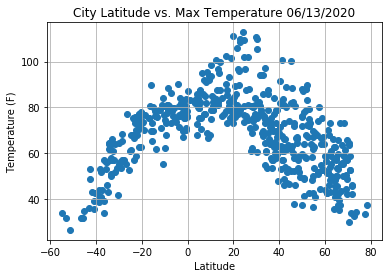

In [33]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output.png")
          
# Show plot
plt.show()

## Latitude vs. Humidity Plot

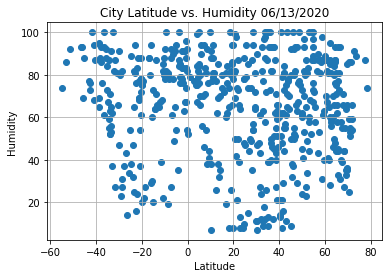

In [35]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

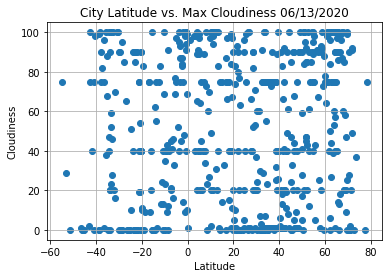

In [37]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

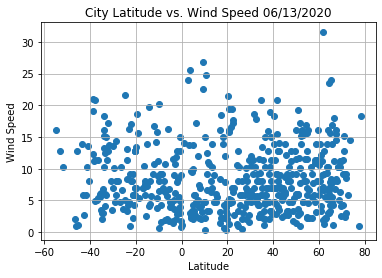

In [39]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots





# thank god this is optional im up at 5 AM xD - Sü

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


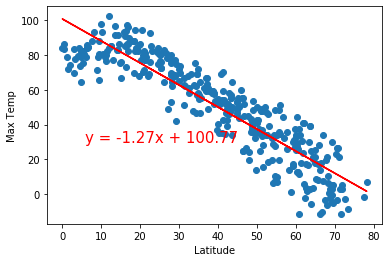

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


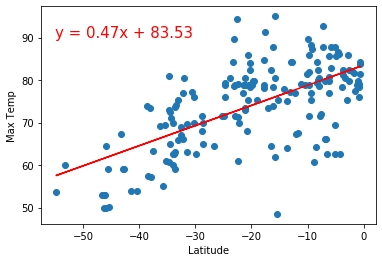

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


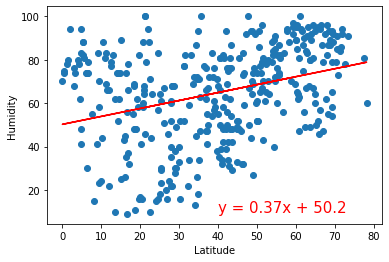

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


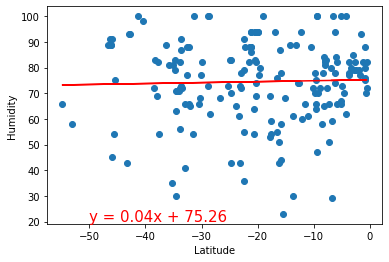

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


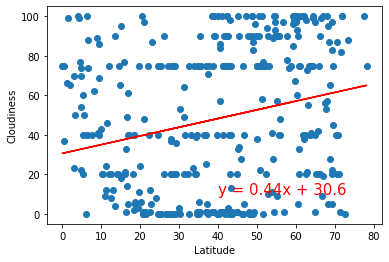

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


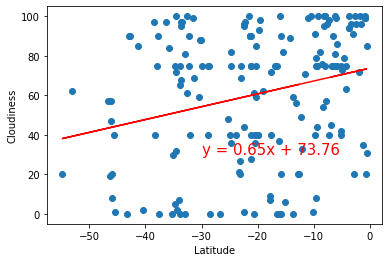

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


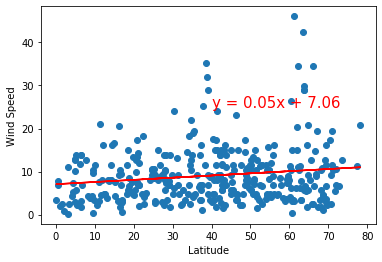

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


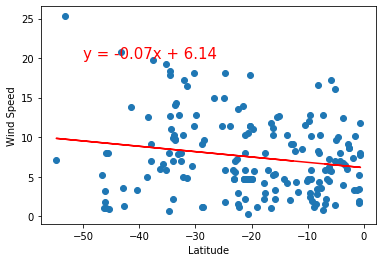